# K-NN (Nearest Neighbour)  

## First we need to import packages that we are going to use 

Import packages for analysis of data 

In [1]:
import numpy as np  
import pandas as pd  

Import packages to plot graphs 

In [2]:
import matplotlib.pyplot as plt  

Import packages for machine learning

In [3]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  



## Load Dataset that is to be used as an example

url of dataset that is to be used 

In [4]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Assign column names and also load dataset using pandas 

In [5]:
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names) 

### Inspect the data

In [6]:
dataset.head()  


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
len(dataset)

150

Sort the data according to the type of flower 

In [8]:
setosa = dataset[dataset['Class']=='Iris-setosa']
versicolor = dataset[dataset['Class']=='Iris-versicolor']
virginica = dataset[dataset['Class']=='Iris-virginica']


In [9]:
setosa

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Visualizing the data 

### Vusualize dataset for sepal length and width  
### Visualize dataset for petal length and width

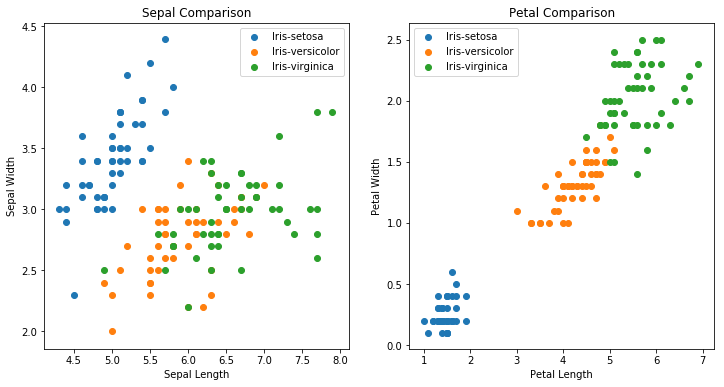

In [10]:

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

plt.scatter(setosa['sepal-length'], setosa['sepal-width'])
plt.scatter(versicolor['sepal-length'], versicolor['sepal-width'])
plt.scatter(virginica['sepal-length'], virginica['sepal-width'])

plt.legend(( 'Iris-setosa','Iris-versicolor', 'Iris-virginica'))
plt.title('Sepal Comparison')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(1, 2, 2)

plt.scatter(setosa['petal-length'], setosa['petal-width'])
plt.scatter(versicolor['petal-length'], versicolor['petal-width'])
plt.scatter(virginica['petal-length'], virginica['petal-width'])
plt.legend(( 'Iris-setosa','Iris-versicolor', 'Iris-virginica'))
plt.title('Petal Comparison')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

 Visualizing dataset with only 2 classes

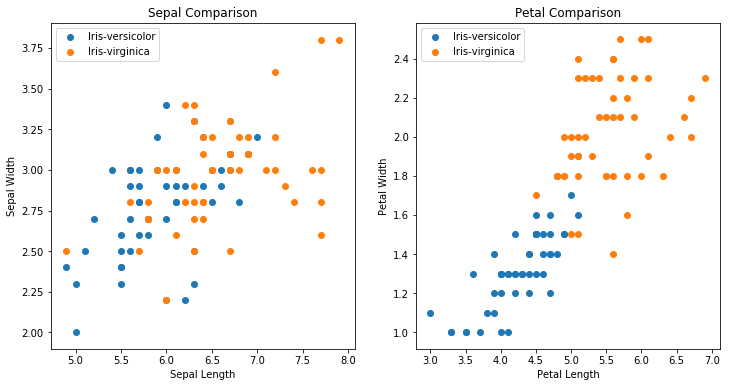

In [11]:
# Vusualize dataset for sepal length and width  
# Visualize dataset for petal length and width

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)


plt.scatter(versicolor['sepal-length'], versicolor['sepal-width'])
plt.scatter(virginica['sepal-length'], virginica['sepal-width'])

plt.legend(( 'Iris-versicolor', 'Iris-virginica'))
plt.title('Sepal Comparison')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(1, 2, 2)


plt.scatter(versicolor['petal-length'], versicolor['petal-width'])
plt.scatter(virginica['petal-length'], virginica['petal-width'])
plt.legend(( 'Iris-versicolor', 'Iris-virginica'))
plt.title('Petal Comparison')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

Trimming the dataset 

this is done to allow easier understanding of the algorithm 

In [12]:
virginica

,sepal-length,sepal-width,petal-length,petal-width,Class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


Combining the dataset 
- we make the dataset smaller to easier analyze the data

In [13]:
trim = pd.concat([virginica, versicolor])
len(trim)

100

### obtain values as input in machine learning algorithm

Obtain data for machine learning algorithm ( petal width and length only )

 Input values 

In [14]:
trim.iloc[:, 2:-1].values   

array([[ 6. ,  2.5],
       [ 5.1,  1.9],
       [ 5.9,  2.1],
       [ 5.6,  1.8],
       [ 5.8,  2.2],
       [ 6.6,  2.1],
       [ 4.5,  1.7],
       [ 6.3,  1.8],
       [ 5.8,  1.8],
       [ 6.1,  2.5],
       [ 5.1,  2. ],
       [ 5.3,  1.9],
       [ 5.5,  2.1],
       [ 5. ,  2. ],
       [ 5.1,  2.4],
       [ 5.3,  2.3],
       [ 5.5,  1.8],
       [ 6.7,  2.2],
       [ 6.9,  2.3],
       [ 5. ,  1.5],
       [ 5.7,  2.3],
       [ 4.9,  2. ],
       [ 6.7,  2. ],
       [ 4.9,  1.8],
       [ 5.7,  2.1],
       [ 6. ,  1.8],
       [ 4.8,  1.8],
       [ 4.9,  1.8],
       [ 5.6,  2.1],
       [ 5.8,  1.6],
       [ 6.1,  1.9],
       [ 6.4,  2. ],
       [ 5.6,  2.2],
       [ 5.1,  1.5],
       [ 5.6,  1.4],
       [ 6.1,  2.3],
       [ 5.6,  2.4],
       [ 5.5,  1.8],
       [ 4.8,  1.8],
       [ 5.4,  2.1],
       [ 5.6,  2.4],
       [ 5.1,  2.3],
       [ 5.1,  1.9],
       [ 5.9,  2.3],
       [ 5.7,  2.5],
       [ 5.2,  2.3],
       [ 5. ,  1.9],
       [ 5.2,

Output values 

In [15]:
trim.iloc[:, 4].values  

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica',

 Assign values to variables 

In [16]:
X = trim.iloc[:, 2:-1].values   

In [17]:
y = trim.iloc[:, 4].values  

## Machine Learning 

 Split dataset into test and train dataset 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)  

Inspecting train dataset 

In [19]:
X_train

array([[ 4.9,  2. ],
       [ 5.2,  2. ],
       [ 6. ,  1.8],
       [ 4.9,  1.5],
       [ 4. ,  1.3],
       [ 4.1,  1.3],
       [ 4.5,  1.7],
       [ 5.7,  2.5],
       [ 3.9,  1.2],
       [ 4.7,  1.2],
       [ 5.6,  2.2],
       [ 5. ,  1.5],
       [ 5. ,  1.7],
       [ 5.4,  2.3],
       [ 5.9,  2.3],
       [ 3.3,  1. ],
       [ 5. ,  2. ],
       [ 6.7,  2. ],
       [ 4.8,  1.8],
       [ 5.1,  1.8],
       [ 4.6,  1.4],
       [ 4. ,  1.3],
       [ 6.4,  2. ],
       [ 3.3,  1. ],
       [ 4.5,  1.5],
       [ 5.8,  1.8],
       [ 5.5,  2.1],
       [ 5.6,  2.1],
       [ 5. ,  1.9],
       [ 5.4,  2.1],
       [ 5.1,  1.9],
       [ 4.6,  1.3],
       [ 5.7,  2.3],
       [ 5.2,  2.3],
       [ 4. ,  1.2],
       [ 3.6,  1.3],
       [ 4.5,  1.5],
       [ 4.3,  1.3],
       [ 3.8,  1.1],
       [ 4.9,  1.8],
       [ 4.5,  1.5],
       [ 3.9,  1.1],
       [ 4.8,  1.8],
       [ 5.6,  2.4],
       [ 5.6,  2.4],
       [ 3.7,  1. ],
       [ 4.4,  1.2],
       [ 6. ,

In [20]:
X_train[:,0]

array([ 4.9,  5.2,  6. ,  4.9,  4. ,  4.1,  4.5,  5.7,  3.9,  4.7,  5.6,
        5. ,  5. ,  5.4,  5.9,  3.3,  5. ,  6.7,  4.8,  5.1,  4.6,  4. ,
        6.4,  3.3,  4.5,  5.8,  5.5,  5.6,  5. ,  5.4,  5.1,  4.6,  5.7,
        5.2,  4. ,  3.6,  4.5,  4.3,  3.8,  4.9,  4.5,  3.9,  4.8,  5.6,
        5.6,  3.7,  4.4,  6. ,  6.1,  4.2,  4. ,  6.9,  5.6,  6.7,  4.8,
        5.1,  4.2,  3. ,  4. ,  5.5,  5.1,  4.1,  6.1,  4.9,  4.7,  4.5,
        5.9,  4.4,  6.1,  3.5])

In [21]:
df_train = pd.DataFrame({'data1':X_train[:,0], 'data2':X_train[:,1], 'class':y_train})

In [22]:
df_train

,class,data1,data2
0,Iris-virginica,4.9,2.0
1,Iris-virginica,5.2,2.0
2,Iris-virginica,6.0,1.8
3,Iris-versicolor,4.9,1.5
4,Iris-versicolor,4.0,1.3
5,Iris-versicolor,4.1,1.3
6,Iris-virginica,4.5,1.7
7,Iris-virginica,5.7,2.5
8,Iris-versicolor,3.9,1.2
9,Iris-versicolor,4.7,1.2


In [23]:
len(df_train)

70

In [24]:
versicolor_train = df_train[df_train['class'] == 'Iris-versicolor']
virginica_train = df_train[df_train['class'] == 'Iris-virginica']

In [25]:
X_test[:,1]

array([ 1.6,  1.3,  1.8,  1.8,  1.5,  1. ,  1.5,  1.4,  1.6,  1.5,  1.5,
        1.6,  1.8,  2.1,  1.6,  2.1,  1.3,  2.2,  1.9,  1. ,  1.2,  1.4,
        1.9,  1.4,  1.4,  1.8,  1.5,  2. ,  2.3,  2.3])

plot train and test data together 

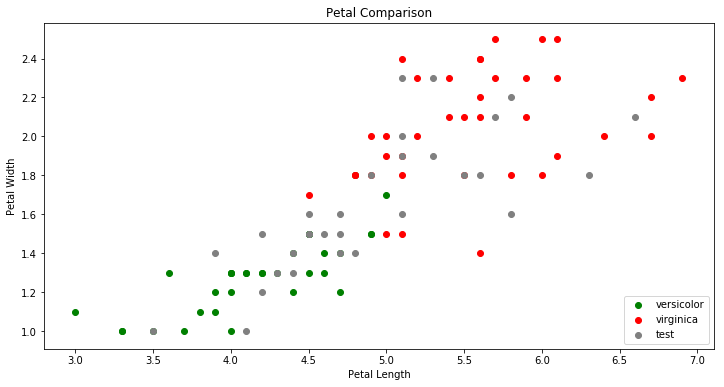

In [26]:
plt.figure(figsize=(12, 6))  

plt.scatter(versicolor_train['data1'],versicolor_train['data2'],color = 'g', label = 'versicolor')
plt.scatter(virginica_train['data1'],virginica_train['data2'],color = 'r', label = 'virginica')
plt.scatter(X_test[:,0],X_test[:,1],c = 'gray', label = 'test')

plt.legend(loc = 4)
plt.title('Petal Comparison')  
plt.xlabel('Petal Length')  
plt.ylabel("Petal Width")  
plt.show()

Transforming data into scalar format to allow easier machine learning

In [27]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [28]:
X_train

array([[-0.00657344,  0.68676044],
       [ 0.33853202,  0.68676044],
       [ 1.25881322,  0.24368919],
       [-0.00657344, -0.42091769],
       [-1.0418898 , -0.86398895],
       [-0.92685464, -0.86398895],
       [-0.46671404,  0.02215356],
       [ 0.91370777,  1.79443858],
       [-1.15692495, -1.08552457],
       [-0.23664374, -1.08552457],
       [ 0.79867262,  1.1298317 ],
       [ 0.10846171, -0.42091769],
       [ 0.10846171,  0.02215356],
       [ 0.56860232,  1.35136733],
       [ 1.14377807,  1.35136733],
       [-1.84713585, -1.52859583],
       [ 0.10846171,  0.68676044],
       [ 2.06405928,  0.68676044],
       [-0.12160859,  0.24368919],
       [ 0.22349686,  0.24368919],
       [-0.35167889, -0.64245332],
       [-1.0418898 , -0.86398895],
       [ 1.71895383,  0.68676044],
       [-1.84713585, -1.52859583],
       [-0.46671404, -0.42091769],
       [ 1.02874292,  0.24368919],
       [ 0.68363747,  0.90829607],
       [ 0.79867262,  0.90829607],
       [ 0.10846171,

Train the KNN Clasifier

In [29]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Obtain prediction of the test casses 

In [30]:
y_pred = classifier.predict(X_test)  


View the results & compare with original answer

In [31]:
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [32]:
y_test

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

Obtain accuracy of model

In [33]:
acc = accuracy_score(y_test, y_pred)


In [34]:
acc

1.0

In [35]:
###################

#### Test for all 4 variables 

In [36]:
X = dataset.iloc[:,0:-1].values

In [37]:
y = dataset.iloc[:,4].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
scalar = StandardScaler()
scalar.fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors = 40)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=40, p=2,
           weights='uniform')

In [39]:
pred = classifier.predict(X_test)

In [40]:
acc = accuracy_score(y_test, pred)

In [41]:
acc

0.84444444444444444

### Calculation of error to choose the most suitable K value 

In [42]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

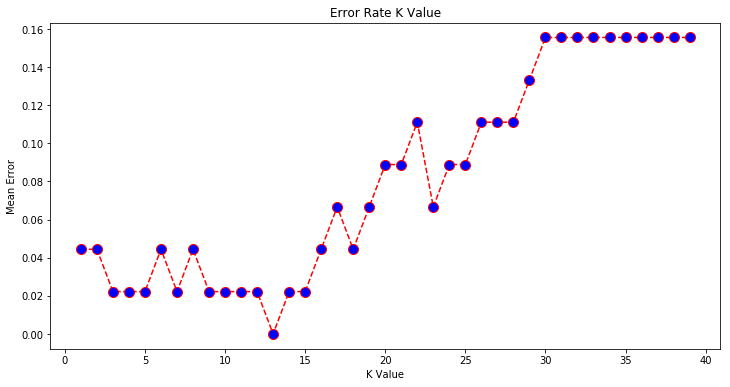

In [43]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()